<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.Einleitung" data-toc-modified-id="1.Einleitung-1">1.Einleitung</a></span></li><li><span><a href="#2.-Simulation" data-toc-modified-id="2.-Simulation-2">2. Simulation</a></span></li><li><span><a href="#2.1-Simulation-der-Temperaturdaten" data-toc-modified-id="2.1-Simulation-der-Temperaturdaten-3">2.1 Simulation der Temperaturdaten</a></span></li><li><span><a href="#2.2-Simulation-der-Gaspreisdaten" data-toc-modified-id="2.2-Simulation-der-Gaspreisdaten-4">2.2 Simulation der Gaspreisdaten</a></span></li><li><span><a href="#3.-Berechnung-des-Deckungsbeitrages" data-toc-modified-id="3.-Berechnung-des-Deckungsbeitrages-5">3. Berechnung des Deckungsbeitrages</a></span></li><li><span><a href="#Berechnung-Heizgradtage" data-toc-modified-id="Berechnung-Heizgradtage-6">Berechnung Heizgradtage</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Interpretation:" data-toc-modified-id="Interpretation:-6.0.1">Interpretation:</a></span></li></ul></li></ul></li></ul></div>

# 1.Einleitung

Ziel:
- Simulation von Temperaturdaten mit Hilfe des erstellten ARMA und GARCH Modells.
- Simulation von Gaspreisdaten mit Hilfe des erstellten ARMA und GARCH Modells, zur späteren Berechnung der HDD und damit des Fernwärmeabsatzes

# 2. Simulation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import SARIMAX
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches
import pylab
from math import sqrt
import statsmodels.api as sm
import seaborn as sns

In [6]:

Kompo_Temp = pd.read_excel(r"C:\Users\admin\Desktop\WINTERSEM\EDA-SM\Case Study1\Kompo_Temp.xls")
ARMA_Temp = pd.read_excel(r"C:\Users\admin\Desktop\WINTERSEM\EDA-SM\Case Study1\ARMA_Temp.xls")
GARCH_Temp = pd.read_excel(r"C:\Users\admin\Desktop\WINTERSEM\EDA-SM\Case Study1\GARCH_Temp.xls" ) 
Kompo_Preis = pd.read_excel(r"C:\Users\admin\Desktop\WINTERSEM\EDA-SM\Case Study1\Kompo_Preis.xls")
ARMA_Preis = pd.read_excel(r"C:\Users\admin\Desktop\WINTERSEM\EDA-SM\Case Study1\ARMA_Preis.xls")
GARCH_Preis = pd.read_excel(r"C:\Users\admin\Desktop\WINTERSEM\EDA-SM\Case Study1\GARCH_Preis.xls" ) 



# 2.1 Simulation der Temperaturdaten

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


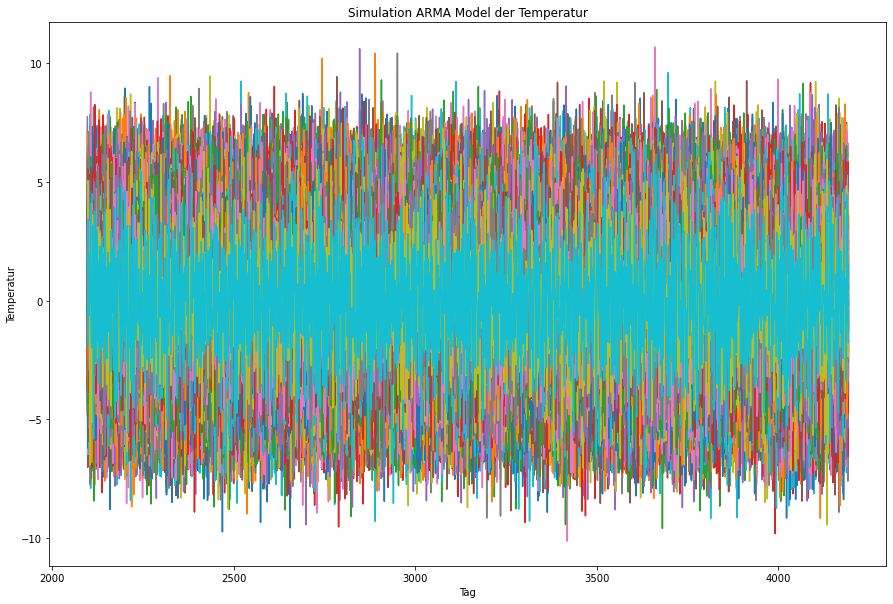

In [7]:
# Simulation des ARMA Modells 

len_Sim = 1000
Temp_diff = Kompo_Temp['residuals_wt'].diff().iloc[20000:-1]
model_temp = SARIMAX(Temp_diff.dropna(), order=(2,1,2))
fitted = model_temp.fit()
ARMA_Simulation = fitted.simulate(nsimulations = len(Temp_diff), repetitions = 1000,  anchor='end')
ARMA_Simulation = pd.DataFrame(ARMA_Simulation)
plt.rcParams["figure.figsize"] = (15, 10)
plt.title('Simulation ARMA Model der Temperatur')
plt.plot(ARMA_Simulation)
plt.xlabel('Tag')
plt.ylabel('Temperatur')
plt.show()



Iteration:      5,   Func. Count:     35,   Neg. LLF: 4458.63810243733
Iteration:     10,   Func. Count:     65,   Neg. LLF: 4502.696550666526
Iteration:     15,   Func. Count:     94,   Neg. LLF: 4438.236238826046
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4438.236238173037
            Iterations: 16
            Function evaluations: 99
            Gradient evaluations: 16


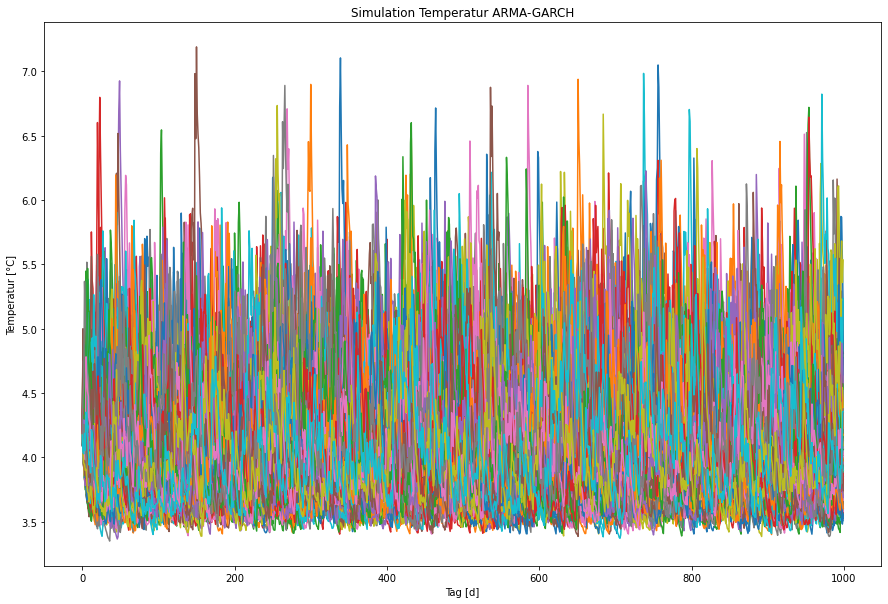

In [5]:
# Simulation des ARMA-GARCH Modells

model_garch = arch_model(ARMA_Temp['residuals'].iloc[1:], mean = 'Constant', vol = 'GARCH', p=1, q=1)
result_garch = model_garch.fit(update_freq = 5)
forecasts = result_garch.forecast(horizon=len_Sim, method="simulation", reindex=False)
AG_Simulation = forecasts.simulations
plt.title('Simulation Temperatur ARMA-GARCH')
plt.plot(AG_Simulation.residual_variances[-1, ::5].T)
plt.xlabel('Tag [d]')
plt.ylabel('Temperatur [°C]')
plt.show()



     residuals_wt                                                        \
              0          1         2          3          4          5     
2097     7.012370  11.666796  5.634711  10.943641   5.123697   8.328209   
2098     9.881170   8.736682  8.864853   6.609054   8.398251  10.437661   
2099    11.461767  10.371964  6.986735   5.352199   7.691839   6.167220   
2100     9.336569   4.288054  9.606260   6.751055   7.834879   6.737067   
2101     6.485252   6.900173  7.186114   4.721839  13.341287   8.069346   
...           ...        ...       ...        ...        ...        ...   
4189     1.446394   0.674978  2.310593   3.112545   0.216707   3.369724   
4190    -1.171914   0.515806  0.066165   3.461616   2.023504   3.159007   
4191     2.965623   6.915747 -1.890822   0.782091   2.427509   0.664128   
4192     0.922176  -0.547458  6.021386  -0.078308   8.093792   1.729333   
4193     2.940499   6.766300  2.750173   1.624808   1.065067   4.663178   

                        

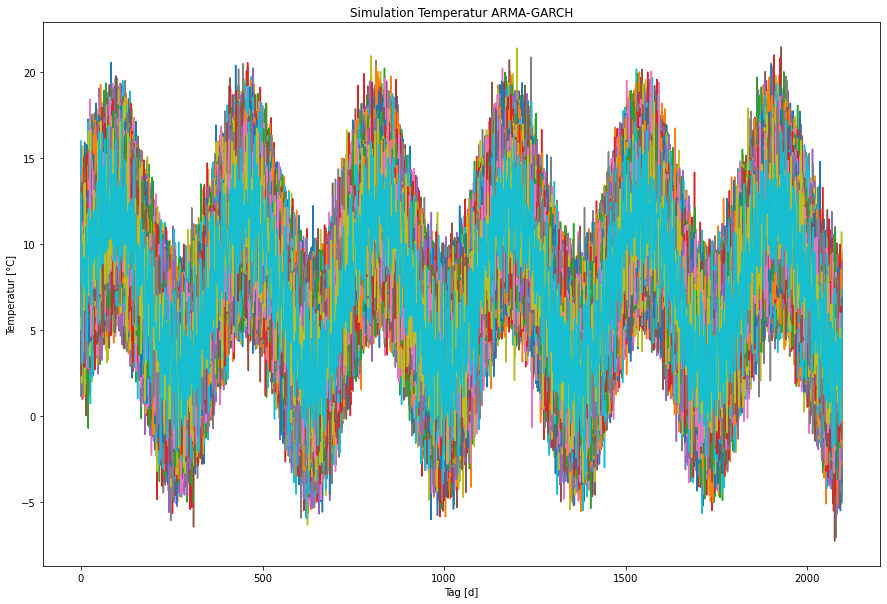

In [6]:
# Berechnung des Trends und Saison

Trend_coef1 = 7.15177 
Trend_coef2 = 0.00013
Saison_coef1 = 4.871596021656086 
Saison_coef2 = 0.11684290496679786

Trend = []
Saison = []

for i in range(1, len(Temp_diff)+1):
    
    
    Trend_reg = Trend_coef1 +  Trend_coef2 * i
    Trend.append(Trend_reg)

    Saison_reg = Saison_coef2 * (np.cos(2*np.pi/365*i)) + Saison_coef1*(np.sin(2*np.pi/365*i))
    Saison.append(Saison_reg)


# Zusammensetzung der verschiedenen Komponenten

SIM_ARMA = pd.DataFrame().reindex_like(ARMA_Simulation)

for i in range(0,1000):
    SIM_ARMA.iloc[:,i]= ARMA_Simulation.iloc[:,i] + np.array(Trend) + np.array(Saison)

print(SIM_ARMA)
#Visualisierung
plt.title('Simulation Temperatur ARMA-GARCH')
plt.plot(SIM_ARMA.to_numpy())
plt.xlabel('Tag [d]')
plt.ylabel('Temperatur [°C]')
plt.show()













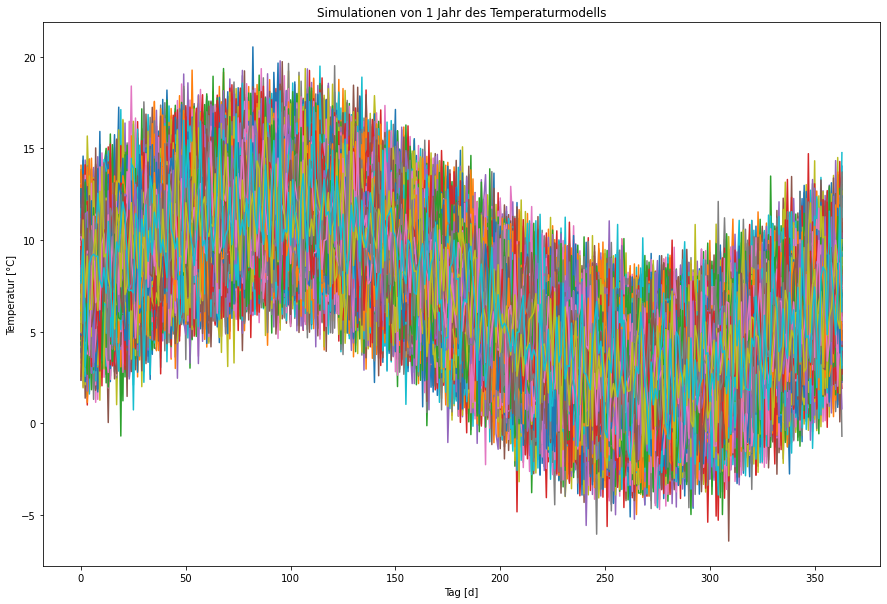

In [7]:

# Betrachtung ein Jahr der Simulation

SIM_final = SIM_ARMA[1:365]

# Visualisierung

plt.title('Simulationen von 1 Jahr des Temperaturmodells')
plt.plot(SIM_final.to_numpy())
plt.xlabel('Tag [d]')
plt.ylabel('Temperatur [°C]')
plt.show()



Die Simulation der Temperaturdaten ist erfolgreich und kann für weitere Berechnungen benutzt werden.
Die Simulation wird mit einem Jahr der Temperaturzeitreihe aus der Modellierung verglichen, kann daraus geschlossen werden, dass die Simulation ein Erfolg war 


# 2.2 Simulation der Gaspreisdaten

Ziel:
Simulation von Gaspreisdaten mit Hilfe des erstellten ARMA und GARCH Modells, zur späteren Berechnung der HDD und damit des Fernwärmeabsatzes.

/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible star

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.91859D+00    |proj g|=  1.15738D+00

At iterate    5    f=  1.36227D+00    |proj g|=  4.61157D-02

At iterate   10    f=  1.33928D+00    |proj g|=  7.63992D-03

At iterate   15    f=  1.33847D+00    |proj g|=  8.14874D-04

At iterate   20    f=  1.33843D+00    |proj g|=  3.95787D-05

At iterate   25    f=  1.33843D+00    |proj g|=  1.93300D-04

At iterate   30    f=  1.33843D+00    |proj g|=  6.76224D-04

At iterate   35    f=  1.33842D+00    |proj g|=  5.85140D-03

At iterate   40    f=  1.33836D+00    |proj g|=  3.02182D-04

At iterate   45    f=  1.33834D+00    |proj g|=  1.21315D-04

At iterate   50    f=  1.33834D+00    |proj g|=  1.22403D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lailafdoul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


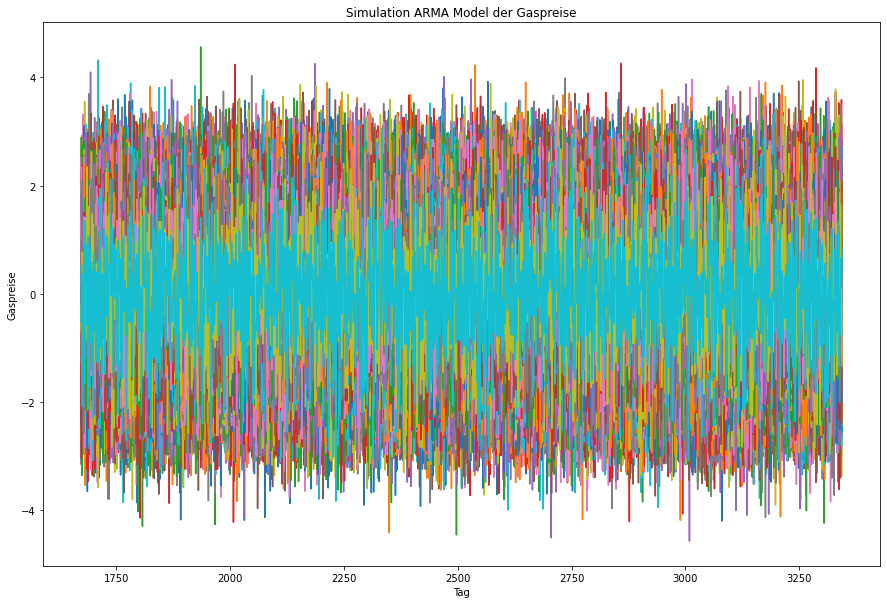

In [8]:
# Simulation des ARMA Modells


Preis_diff = Kompo_Preis['residuals_wt_'].diff()

model_temp = SARIMAX(Preis_diff.dropna(), order=(2,1,2))
fitted = model_temp.fit()
ARMA_Simulation_Preis = fitted.simulate(nsimulations = len(Preis_diff), repetitions = 1000,  anchor='end')
ARMA_Simulation_Preis = pd.DataFrame(ARMA_Simulation_Preis)
plt.rcParams["figure.figsize"] = (15, 10)
plt.title('Simulation ARMA Model der Gaspreise')
plt.plot(ARMA_Simulation_Preis)
plt.xlabel('Tag')
plt.ylabel('Gaspreise')
plt.show()


Die Simulation wird mit einem Jahr der Gaspreiszeitreihe aus der Modellierung verglichen, kann eine Ähnlichkeit hergestellt werden. Allerdings ist die Varianz der Simulationen sehr groß.

Iteration:     10,   Func. Count:     63,   Neg. LLF: 417.36120465270574
Optimization terminated successfully    (Exit mode 0)
            Current function value: 417.3610876096543
            Iterations: 13
            Function evaluations: 77
            Gradient evaluations: 13


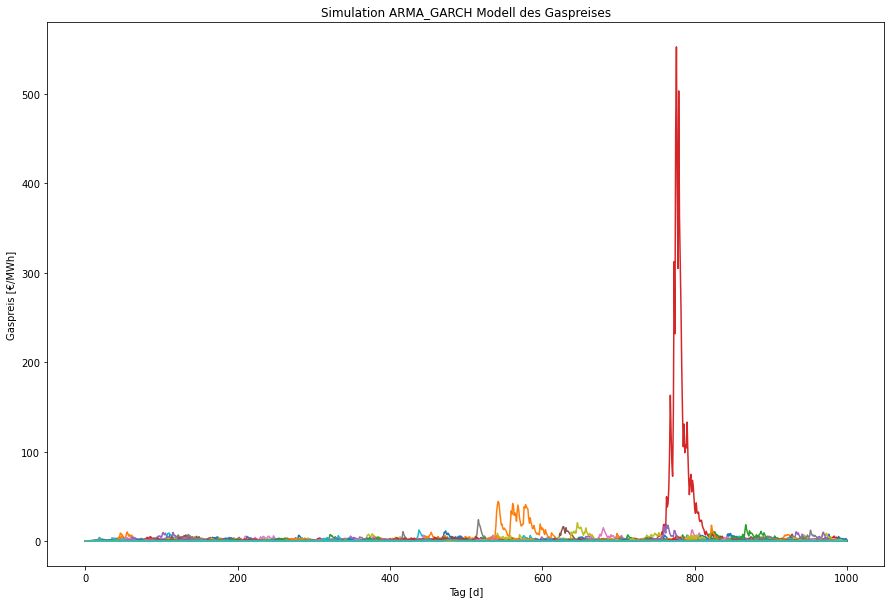

In [9]:
# Simulation des ARMA-GARCH Modells

GARCH_Preis = arch_model(ARMA_Preis['residuals'].iloc[1:], mean = 'Constant', vol = 'GARCH', p=1, q=1)
Garch_Preis_r = GARCH_Preis.fit(update_freq = 10)
forecasts_Preis = Garch_Preis_r.forecast(horizon=len_Sim, method="simulation", reindex=False)
AG_Simulation_Preis = forecasts_Preis.simulations
plt.title('Simulation ARMA_GARCH Modell des Gaspreises')
plt.plot(AG_Simulation_Preis.residual_variances[-1, ::1].T)
plt.xlabel('Tag [d]')
plt.ylabel('Gaspreis [€/MWh]')
plt.show()




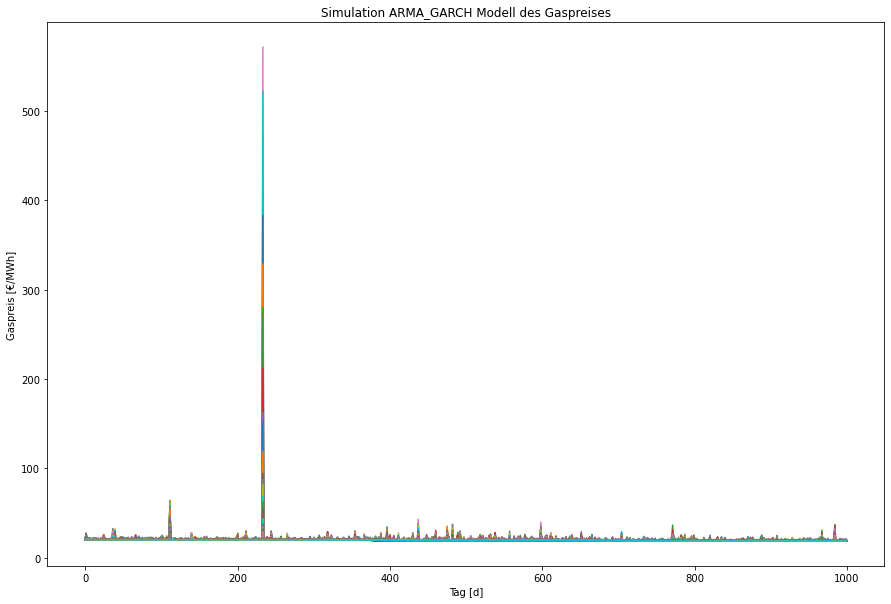

In [10]:
# Berechnung des Trends und Saison

preis_tcoef1 = 20.03082490407418         # Koeffizienten wurden aus dem Komponentenmodell entnommen 
preis_tcoef2 = -0.0017752505058644197
preis_Scoef1 = -0.028738201917118615  
preis_Scoef2 = -0.17238493723847165

Trend_preis = []
Saison_preis = []

for i in range(1, len(Preis_diff)+1):
    
    
    Trend_regp = preis_tcoef1 +  preis_tcoef2 * i
    Trend_preis.append(Trend_regp)

    Saison_regp = preis_Scoef1 * (np.cos(2*np.pi/365*i)) + preis_Scoef2 *(np.sin(2*np.pi/365*i))
    Saison_preis.append(Saison_regp)

# Zusammensetzung der verschiedenen Komponenten

ARMA_GARCH_Sim = pd.DataFrame(AG_Simulation_Preis.residual_variances[-1, ::1])
ARMA_GARCH_Preis = pd.DataFrame().reindex_like(ARMA_GARCH_Sim)


for i in range(0,1000):
    
    ARMA_GARCH_Preis.iloc[:,i] = ARMA_GARCH_Sim.iloc[:,i] + np.array(Trend_preis)[:1000] + np.array(Saison_preis)[:1000]
    
#Visualisierung

plt.title('Simulation ARMA_GARCH Modell des Gaspreises')
plt.plot(ARMA_GARCH_Preis.to_numpy())
plt.xlabel('Tag [d]')
plt.ylabel('Gaspreis [€/MWh]')
plt.show()








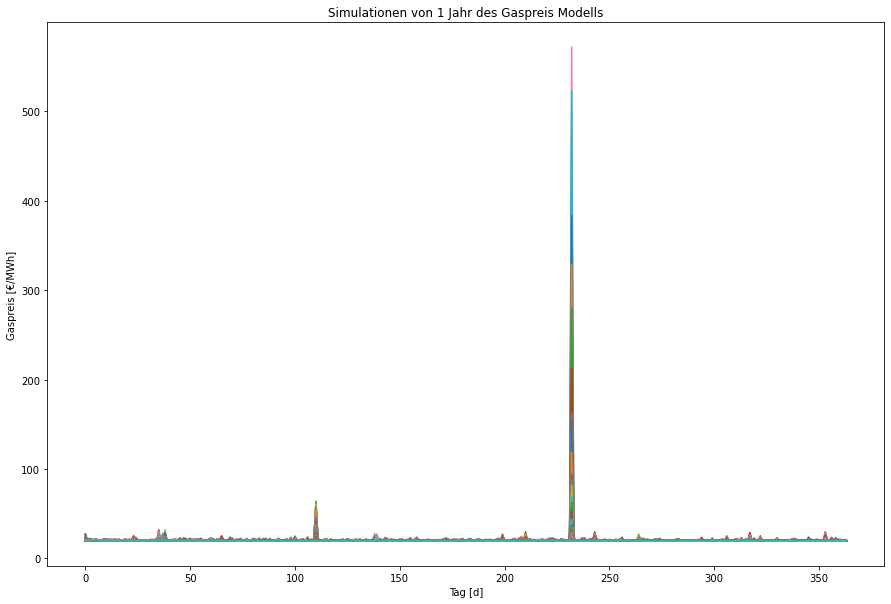

In [11]:
# Betrachtung ein Jahr der Simulation

Preis_SIM_final = ARMA_GARCH_Preis[1:365]

# Visualisierung

plt.title('Simulationen von 1 Jahr des Gaspreis Modells')
plt.plot(Preis_SIM_final.to_numpy())
plt.xlabel('Tag [d]')
plt.ylabel('Gaspreis [€/MWh]')
plt.show()

# 3. Berechnung des Deckungsbeitrages


Ziel:

Abschätzung des Gesamtrisikos des Fernwärmeversorgers mit Hilfe des Deckungsbeitrages

# Berechnung Heizgradtage

Ziel:
Simulation der HDD Daten aus den Temperaturdaten

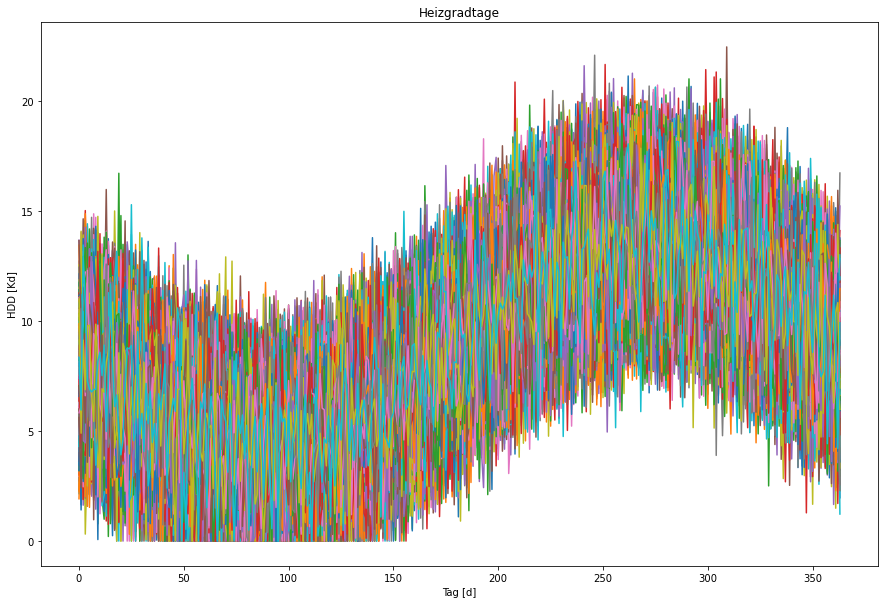

In [12]:
# Berechnung der HDD

zeros_vect = np.zeros((SIM_final.shape))
HDD_tsim = np.maximum(zeros_vect, 16 - SIM_final)

# Visualisierung

plt.title('Heizgradtage')
plt.plot(HDD_tsim.to_numpy())
plt.xlabel('Tag [d]')
plt.ylabel('HDD [Kd]')
plt.show()


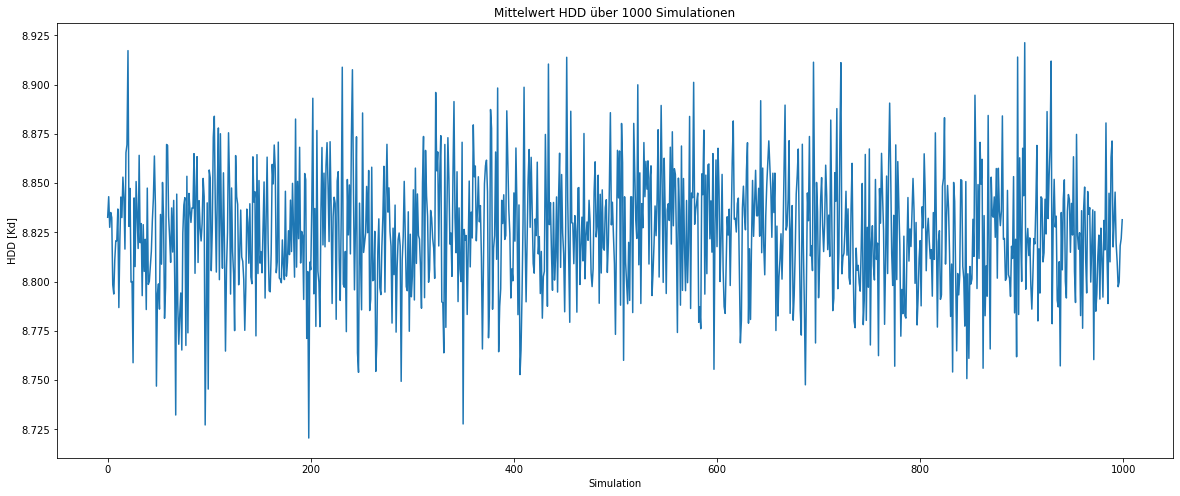

In [13]:
# Plot des Mittelwertes der HDD

plt.rcParams["figure.figsize"] = (20, 8)
HDD_Sim = np.mean(HDD_tsim)
plt.title('Mittelwert HDD über 1000 Simulationen')
plt.plot(HDD_Sim.to_numpy(), label='Close')
plt.xlabel('Simulation')
plt.ylabel('HDD [Kd]')
plt.show()



### Interpretation:

#Bei Vergleich des Mittelwertes der HDD Daten mit den ursprünglichen HDD Daten der Temperatur, ist die Simulation ein Erfolg.
Vor allem die Nullwerte im Sommer sprechen für eine erfolgreiche Simulation. 

In [59]:
# Absatzfunktion pro Tag

Absatz_tsim = 20 + 30 * (HDD_tsim)

Gaspreis_tsim = Preis_SIM_final

# Schätzung des Mittelwert des Gaspreis

Gaspreis_mean = np.mean(Preis_SIM_final)

Gaspreis_tsim = np.mean(Gaspreis_mean)

# Erlöse pro Tag 

Erlös_tsim = Absatz_tsim * (Gaspreis_tsim + 5)

# Kosten pro Tag 

kosten_tsim = Absatz_tsim * Gaspreis_tsim



In [60]:
# Deckungsbeitrag ohne Absicherung pro Tag

DB_GF_tsim = Erlös_tsim - kosten_tsim
DB_GF_sim= np.mean(DB_GF_tsim)
HDD_basis = np.mean(HDD_Sim)


Bei Vergleich des Mittelwertes der HDD Daten mit den ursprünglichen HDD Daten der Temperatur, ist die Simulation ein Erfolg.
Vor allem die Nullwerte im Sommer sprechen für eine erfolgreiche Simulation.

In [58]:

# Ziel: das DB Risiko minimieren


from scipy.optimize import minimize

Risiko = 0.01


# Optimierungsfunktion

def Risk(x):
    
    DB = (x[0] * (HDD_basis - HDD_Sim).to_numpy()) + (x[1]*(Gaspreis_tsim - Gaspreis_mean).to_numpy()) + DB_GF_sim.to_numpy()
        
    return np.quantile(DB, Risiko)


# Initialisierung

x0 = np.zeros(([2,1]))

# Optimierung

result = minimize(Risk,x0,method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

# Ergebnis

print(result,'\n\n')
print('Tick Value', result.x[0])
print('Volume ', result.x[1])
print('Das Risiko', result.fun)




 final_simplex: (array([[-6.06862353e+41,  9.52347084e+40],
       [-3.59912057e+41,  5.64808800e+40],
       [-2.13453163e+41,  3.34971342e+40]]), array([-5.72137959e+40, -3.39318049e+40, -2.01239467e+40]))
           fun: -5.721379588267702e+40
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 401
           nit: 200
        status: 1
       success: False
             x: array([-6.06862353e+41,  9.52347084e+40]) 


Tick Value -6.068623534349607e+41
Volume  9.523470836401168e+40
Das Risiko -5.721379588267702e+40


Das Risiko kann mittels einer Begrenzung des Gas Einkaufspreises minimiert werden. Es kann z.B. nur Gas eingekauft werden, wenn der Gaspreis eine bestimmte Preis-Schwelle unterschreitet.